In [1]:
import pandas as pd
import string


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download()

from nltk.corpus import stopwords

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
data_df = pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
data_df.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [3]:
#change col names
data_df.columns = ['label','sms_text']
data_df.head()

,label,sms_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [3]:
data_df.shape #5568 rows and 2 colummns

(5568, 2)

In [9]:
data_df.isnull().sum() #no null values

label       0
sms_text    0
dtype: int64

In [10]:
data_df.info() #data type of both columns is string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5568 non-null   object
 1   sms_text  5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [4]:
data_df['label'].unique() #binary classification problem

array(['ham', 'spam'], dtype=object)

In [ ]:
#Data is imbalanced:
#13.4 messages are spam
#86.6 % messages are ham

In [5]:
data_df['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

<AxesSubplot:>

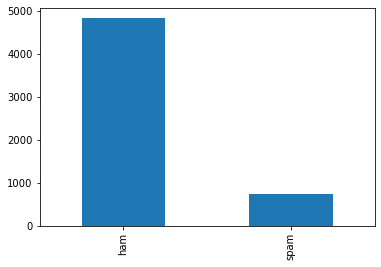

In [13]:
data_df['label'].value_counts().plot(kind='bar')

In [6]:
#1) convert label to numerical value:
#spam = 1, ham = 0

data_df['label_num'] = data_df['label'].map({'ham': 0, 'spam':1})
data_df.head()

,label,sms_text,label_num
0,ham,I've been searching for the right words to tha...,0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
2,ham,"Nah I don't think he goes to usf, he lives aro...",0
3,ham,Even my brother is not like to speak with me. ...,0
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,0


In [ ]:
#Most common spam words :

In [7]:
from nltk.tokenize import word_tokenize 

def tokenize(text):
    return word_tokenize(text.lower())

In [8]:


#1
data_df['text_tokenized'] = data_df['sms_text'].apply(tokenize)

#2
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text_wo_stwr = []
    for word in text :
        if word not in stopword:
            text_wo_stwr.append(word)
            
    return (text_wo_stwr)
data_df['text_token_stopwords'] = data_df['text_tokenized'].apply(remove_stopwords) 

#3
ps = nltk.PorterStemmer()
def stemming(tokenized_list):
    new_list = []
    for word in tokenized_list :
        new_list.append(ps.stem(word))
        
    return new_list
data_df['text_token_stopwords_stem'] = data_df['text_token_stopwords'].apply(stemming)

data_df.head()


,label,sms_text,label_num,text_tokenized,text_token_stopwords,text_token_stopwords_stem
0,ham,I've been searching for the right words to tha...,0,"[i, 've, been, searching, for, the, right, wor...","['ve, searching, right, words, thank, breather...","['ve, search, right, word, thank, breather, .,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah, n't, think, goes, usf, ,, lives, around,...","[nah, n't, think, goe, usf, ,, live, around, t..."
3,ham,Even my brother is not like to speak with me. ...,0,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, ., treat, like, a...","[even, brother, like, speak, ., treat, like, a..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,0,"[i, have, a, date, on, sunday, with, will, !, !]","[date, sunday, !, !]","[date, sunday, !, !]"


In [9]:
spam_msgs_only = data_df[data_df['label_num'] == 1]['text_token_stopwords_stem']
spam_msgs_only

1       [free, entri, 2, wkli, comp, win, fa, cup, fin...
6       [winner, !, !, valu, network, custom, select, ...
7       [mobil, 11, month, ?, u, r, entitl, updat, lat...
9       [six, chanc, win, cash, !, 100, 20,000, pound,...
10      [urgent, !, 1, week, free, membership, £100,00...
                              ...                        
5533    [want, explicit, sex, 30, sec, ?, ring, 020731...
5536    [ask, 3mobil, 0870, chatlin, inclu, free, min,...
5543    [contract, mobil, 11, mnth, ?, latest, motorol...
5562    [remind, o2, :, get, 2.50, pound, free, call, ...
5563    [2nd, time, tri, 2, contact, u., u, £750, poun...
Name: text_token_stopwords_stem, Length: 746, dtype: object

[('.', 924), ('!', 543), (',', 377), ('call', 365), ('free', 219), ('&', 178), ('2', 174), ('?', 174), ('txt', 169), (':', 163), ('ur', 144), ('u', 142), ('text', 139), ('mobil', 135), ('4', 120), ('stop', 118), ('claim', 115), ('*', 115), ('repli', 112), ('prize', 94)]


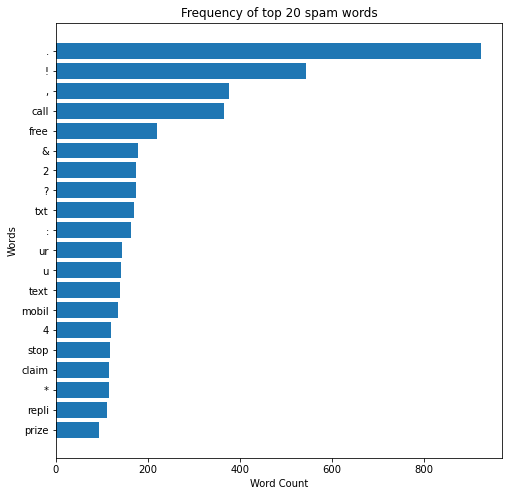

In [12]:
from collections import Counter
#will return 20 most common words 
def ret_word_cnt(tokenized_list):

    spam_words = Counter()
    for msg in tokenized_list :
        spam_words.update(msg)

    return (spam_words.most_common(20))

print(ret_word_cnt(spam_msgs_only))

#--------------------------------------------------

freq_of_word = [val[1] for val in ret_word_cnt(spam_msgs_only)]
#reverse as matplotlib starts drawing graphs from bottom
freq_of_word = freq_of_word[::-1]

#reverse as matplotlib starts drawing graphs from bottom
word = [val[0] for val in ret_word_cnt(spam_msgs_only)]
word = word[::-1]

plt.figure(figsize=(8,8))
plt.barh(word,freq_of_word)
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.title('Frequency of top 20 spam words');

#punctuations are very common in spam messages - . ! , & ? : *
#words like call, free , txt, claim, prize 